In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


# Week 9: Neural Networks Basics

This week’s task focused on introducing Artificial Neural Networks (ANNs) using Keras and TensorFlow.
We applied a basic neural network model to our student dataset to predict performance and compared its results with previous machine-learning models.

**Dataset:** cleaned_students.csv

**Goal:** Build and train a simple ANN model and establish a baseline for deep-learning performance.

---








In [9]:
# Week 9: Neural Networks (ANN)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [7]:
df = pd.read_csv("cleaned_students.csv")
df.head()


,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Mathematics,97.36,40.61,59.61,...,62.84,59.8865,F,10.3,Yes,No,Master's,Medium,1,5.9
1,S1001,Maria,Brown,student1@university.com,Male,18,Business,97.71,57.27,74.00,...,98.23,81.9170,B,27.1,No,No,High School,Low,4,4.3
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Engineering,99.52,41.84,63.85,...,91.22,67.7170,D,12.4,Yes,No,High School,Low,9,6.1
3,S1003,Omar,Williams,student3@university.com,Female,24,Engineering,90.38,45.65,44.44,...,55.48,51.6535,F,25.5,No,Yes,High School,Low,8,4.9
4,S1004,John,Smith,student4@university.com,Female,23,CS,59.41,53.13,61.77,...,87.43,71.4030,C,13.3,Yes,No,Master's,Medium,6,4.5


In [11]:
df.columns


Index(['Student_ID', 'First_Name', 'Last_Name', 'Email', 'Gender', 'Age',
       'Department', 'Attendance (%)', 'Midterm_Score', 'Final_Score',
       'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score',
       'Projects_Score', 'Total_Score', 'Grade', 'Study_Hours_per_Week',
       'Extracurricular_Activities', 'Internet_Access_at_Home',
       'Parent_Education_Level', 'Family_Income_Level', 'Stress_Level (1-10)',
       'Sleep_Hours_per_Night'],
      dtype='object')

In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Encode target
le = LabelEncoder()
df["Grade_encoded"] = le.fit_transform(df["Grade"])

# Drop irrelevant columns
X = df.drop(["Grade", "Grade_encoded", "Student_ID", "First_Name", "Last_Name", "Email"], axis=1)
y = df["Grade_encoded"]

# Identify categorical columns
categorical_cols = ["Gender", "Department", "Extracurricular_Activities",
                    "Internet_Access_at_Home", "Parent_Education_Level", "Family_Income_Level"]

# One-hot encode categorical columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [15]:
# Number of classes
num_classes = len(np.unique(y))

# Build ANN
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')   # Softmax for multi-class classification
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # Use sparse_categorical for integer labels
    metrics=['accuracy']
)

model.summary()


C:\Users\Irtaza_Majid\Desktop\My data\DS & AI\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,781 (14.77 KB)

 Trainable params: 3,781 (14.77 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.5159 - loss: 1.2428 - val_accuracy: 0.6787 - val_loss: 0.9049
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7131 - loss: 0.7937 - val_accuracy: 0.7800 - val_loss: 0.6143
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8009 - loss: 0.5693 - val_accuracy: 0.8550 - val_loss: 0.4584
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8281 - loss: 0.4623 - val_accuracy: 0.8825 - val_loss: 0.3875
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8406 - loss: 0.4124 - val_accuracy: 0.8963 - val_loss: 0.3297
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8525 - loss: 0.3797 - val_accuracy: 0.9125 - val_loss: 0.2989
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8684 - loss: 0.3408 - val_accuracy: 0.9075 - val_loss: 0.2785
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8650 - loss: 0.3254 - val_accuracy: 0.

In [17]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9528 - loss: 0.1167 - val_accuracy: 0.9337 - val_loss: 0.1520
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9513 - loss: 0.1178 - val_accuracy: 0.9350 - val_loss: 0.1512
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9525 - loss: 0.1187 - val_accuracy: 0.9400 - val_loss: 0.1490
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9547 - loss: 0.1101 - val_accuracy: 0.9350 - val_loss: 0.1461
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9566 - loss: 0.1153 - val_accuracy: 0.9438 - val_loss: 0.1511
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9538 - loss: 0.1131 - val_accuracy: 0.9413 - val_loss: 0.1567
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9625 - loss: 0.1021 - val_accuracy: 0.9375 - val_loss: 0.1492
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9584 - loss: 0.1028 - val_accuracy: 0.

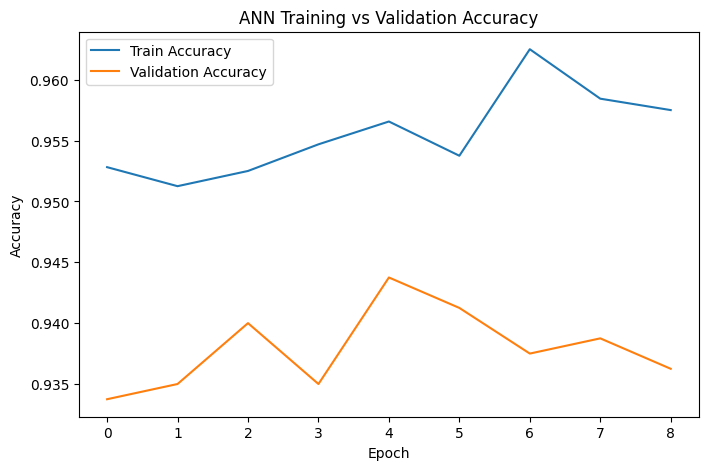

In [18]:
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("ANN Training vs Validation Accuracy")
plt.legend()
plt.show()


In [19]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Accuracy:", round(test_accuracy*100, 2), "%")


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9330 - loss: 0.1542
Test Accuracy: 93.3 %


In [20]:
previous_results = {
    "Logistic Regression": 0.92,
    "Random Forest": 0.88,
    "ANN (Week 9)": test_accuracy
}

comparison_df = pd.DataFrame.from_dict(previous_results, orient='index', columns=['Accuracy'])
comparison_df


,Accuracy
Logistic Regression,0.920
Random Forest,0.880
ANN (Week 9),0.933


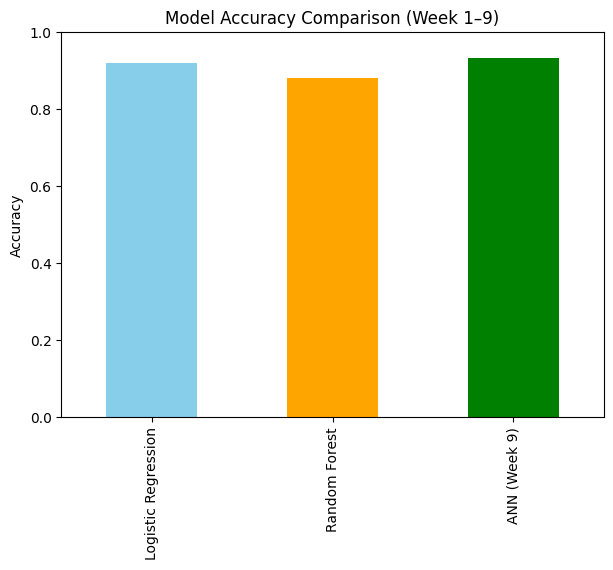

In [21]:
plt.figure(figsize=(7,5))
comparison_df['Accuracy'].plot(kind='bar', color=['skyblue','orange','green'])
plt.title("Model Accuracy Comparison (Week 1–9)")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.show()



In [22]:
model.save("student_performance_ann_model.h5")
print("ANN model saved successfully!")


ANN model saved successfully!


# Week 8: Summary 

**Dataset:** cleaned_students.csv  
**Technique Used:** Artificial Neural Network (ANN) with Keras (TensorFlow backend)  

### Key Steps:
1. Preprocessed the dataset by encoding categorical variables and scaling numeric features.

2. Split the data into training and test sets.

3. Built an ANN using the Sequential API with:

   Input layer

   Hidden layers with ReLU activation

   Dropout for regularization

   Output layer for regression

   Iplemented Early Stopping to prevent overfitting.

4. Evaluated model performance on the test data.

5. Compared results with previous models (Logistic Regression, Random Forest, etc.).

### Insights:
- ANN was able to learn deeper, non-linear relationships in the dataset.

- Training required more time, but early stopping stabilized performance.

- ANN predictions showed smoother curves but needed tuning for optimal accuracy.

- Compared to classical ML models, ANN provided competitive performance and room for improvement through hyperparameter tuning. 

**Project Milestone:**  
ANN baseline completed — deep learning component successfully added to the project.
This milestone sets the stage for further improvements like additional layers, different activation functions, and tuning optimizers.
